In [1]:
import numpy as np
import xarray as xr
import scipy as sp
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
from PySDM_examples.Shipway_and_Hill_2012 import Simulation, Settings, plot
from PySDM.physics import si

In [3]:
n_sd_per_gridbox = 10
dt = 25*si.s
dz = 100*si.m
rho_times_w = 2*si.m/si.s

output = Simulation(Settings(n_sd_per_gridbox=n_sd_per_gridbox, rho_times_w_1=rho_times_w, dt=dt, dz=dz, precip=False)).run()

In [4]:
with open("PySDM_output_qv0.pkl","wb") as f:
    pkl.dump(output, f)

In [3]:
with open("PySDM_output_w2.pkl","rb") as f:
    output = pkl.load(f)

In [4]:
t_sdm_choose = 1

In [5]:
t_sdm = output["t"]
z_sdm = output["z"]
rhod_sdm0 = output["rhod"][:,t_sdm_choose]
qv_sdm0 = output["qv"][:,t_sdm_choose]
thetad_sdm0 = output["thd"][:,t_sdm_choose]
T_sdm0 = output["T"][:,t_sdm_choose]
P_sdm0 = output["p"][:,t_sdm_choose]
ql_sdm0 = output["ql"][:,t_sdm_choose]
theta_ql = output[""]

In [6]:
ds_julia = xr.open_dataset("../Output.nc", group="profiles")
ds_julia

<xarray.Dataset>
Dimensions:      (zf: 257, zc: 256, t: 302)
Coordinates:
  * zf           (zf) float64 0.0 7.812 15.62 ... 1.984e+03 1.992e+03 2e+03
  * zc           (zc) float64 3.906 11.72 19.53 ... 1.98e+03 1.988e+03 1.996e+03
  * t            (t) float64 0.0 1.0 3.0 5.0 7.0 ... 595.0 597.0 599.0 600.0
Data variables:
    density      (t, zc) float64 ...
    temperature  (t, zc) float64 ...
    theta_dry    (t, zc) float64 ...
    pressure     (t, zc) float64 ...
    q_liq        (t, zc) float64 ...

In [7]:
ds_julia0 = ds_julia.isel(t=0)

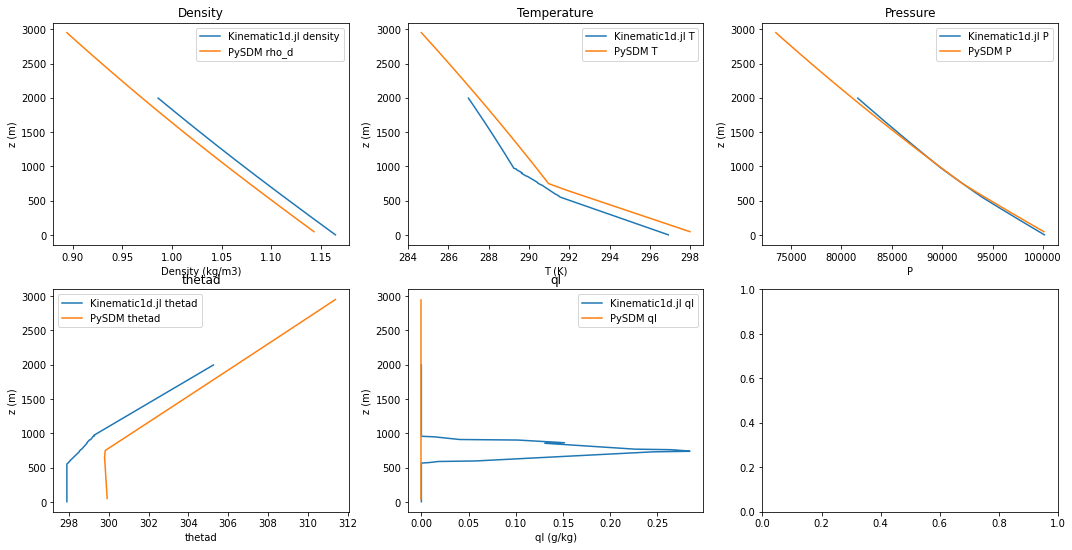

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(18,9))

ax[0][0].plot(ds_julia0['density'], ds_julia0['zc'], label='Kinematic1d.jl density')
ax[0][0].plot(rhod_sdm0, z_sdm, label="PySDM rho_d")
ax[0][0].set_title('Density')
ax[0][0].set_xlabel('Density (kg/m3)')
ax[0][0].set_ylabel('z (m)')
ax[0][0].legend()

ax[0][1].plot(ds_julia0['temperature'], ds_julia0['zc'], label='Kinematic1d.jl T')
ax[0][1].plot(T_sdm0, z_sdm, label="PySDM T")
ax[0][1].set_title('Temperature')
ax[0][1].set_xlabel('T (K)')
ax[0][1].set_ylabel('z (m)')
ax[0][1].legend()

ax[0][2].plot(ds_julia0['pressure'], ds_julia0['zc'], label='Kinematic1d.jl P')
ax[0][2].plot(P_sdm0, z_sdm, label="PySDM P")
ax[0][2].set_title('Pressure')
ax[0][2].set_xlabel('P')
ax[0][2].set_ylabel('z (m)')
ax[0][2].legend()

ax[1][0].plot(ds_julia0['theta_dry'], ds_julia0['zc'], label='Kinematic1d.jl thetad')
ax[1][0].plot(thetad_sdm0, z_sdm, label="PySDM thetad")
ax[1][0].set_title('thetad')
ax[1][0].set_xlabel('thetad')
ax[1][0].set_ylabel('z (m)')
ax[1][0].legend()

ax[1][1].plot(ds_julia0['q_liq']*1000, ds_julia0['zc'], label='Kinematic1d.jl ql')
ax[1][1].plot(ql_sdm0, z_sdm, label="PySDM ql")
ax[1][1].set_title('ql')
ax[1][1].set_xlabel('ql (g/kg)')
ax[1][1].set_ylabel('z (m)')
ax[1][1].legend()

plt.savefig("wet case, t0.png")